# Brain visualization

In [ ]:
# Subcortical visualization
from enigmatoolbox.plotting import plot_subcortical

# orig_sctx_list = ['Amygdala','Hippocampus','Caudate','Pallidum','Accumbens','Putamen','Thalamus'];
# reorder_sctx_list = ['Accumbens', 'Amygdala', 'Caudate', 'Hippocampus', 'Pallidum', 'Putamen','Thalamus', 'Ventricle];
# L to R
# if True include ventricle [1x16] else except [1x14];

ANOVA_DC_f_123_sctx = np.load(join(main_path, 'result/latent_210/main_result/subcortical','ANOVA_DC_f_123_sctx.npy'))

DC_sub1_mean_Msctx2ctx_regout = np.load(join(main_path, 'result/latent_210/main_result/subcortical','DC_sub1_mean_Msctx2ctx_regout.npy'))
DC_sub2_mean_Msctx2ctx_regout = np.load(join(main_path, 'result/latent_210/main_result/subcortical','DC_sub2_mean_Msctx2ctx_regout.npy'))
DC_sub3_mean_Msctx2ctx_regout = np.load(join(main_path, 'result/latent_210/main_result/subcortical','DC_sub3_mean_Msctx2ctx_regout.npy'))
  

f_data = np.array(list(ANOVA_DC_f_123_sctx[[4,0,2,1,3,5,6]]) + list(ANOVA_DC_f_123_sctx[[4,0,2,1,3,5,6]]))
dc_sub1 = np.array(list(DC_sub1_mean_Msctx2ctx_regout[[4,0,2,1,3,5,6]]) + list(DC_sub1_mean_Msctx2ctx_regout[[4,0,2,1,3,5,6]]))
dc_sub2 = np.array(list(DC_sub2_mean_Msctx2ctx_regout[[4,0,2,1,3,5,6]]) + list(DC_sub2_mean_Msctx2ctx_regout[[4,0,2,1,3,5,6]]))
dc_sub3 = np.array(list(DC_sub3_mean_Msctx2ctx_regout[[4,0,2,1,3,5,6]]) + list(DC_sub3_mean_Msctx2ctx_regout[[4,0,2,1,3,5,6]]))

plot_target = 'base_region' # f, DC, base_region

# Project the results on the surface brain

if plot_target == 'f':
    # f-stat
    plot_subcortical(array_name=f_data, size=(1600, 400), ventricles = False, cmap='autumn', color_bar=True, color_range=(8, 18)) # viridis autumn
elif plot_target == 'DC':
    # Subgroup DC
    plot_subcortical(array_name=dc_sub2, size=(1600, 400), ventricles = False, cmap='viridis_r', color_bar=True) # viridis Reds
    
elif plot_target =='base_region':
    def base_region(name):
        region = np.zeros(14)
        region[name]=1
        
        return region
    
    Accumbens = [0,7]
    Amygdala = [1,8] 
    Caudate = [2,9]
    Hippocampus = [3,10]
    Pallidum = [4,11]
    Putamen = [5,12]
    Thalamus = [6,13]
    
    region_data = base_region(Accumbens)
    
    plot_subcortical(array_name=region_data, size=(1600, 400), ventricles = False, cmap='Greys', color_bar=True, color_range = (-0.2,1)) # viridis autumn
    

In [ ]:
# Prepare visualization

import vtk

from vtk import vtkPolyDataNormals

from brainspace.mesh.mesh_io import read_surface
from brainspace.mesh.mesh_operations import combine_surfaces
from brainspace.utils.parcellation import reduce_by_labels
from brainspace.vtk_interface import wrap_vtk, serial_connect

template_path = join(main_path,"template/MMP")
template_L = "L.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.L.midthickness_MSMAll.10k_fs_LR.surf.gii # L.very_inflated_MSMAll.10k_fs_LR.surf.gii
template_R = "R.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.R.midthickness_MSMAll.10k_fs_LR.surf.gii # R.very_inflated_MSMAll.10k_fs_LR.surf.gii

surfs = [None] * 2

surfs[0] = read_surface(join(template_path,template_L)) 
nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
surf_lh = serial_connect(surfs[0], nf)

surfs[1] = read_surface(join(template_path,template_R)) 
nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
surf_rh = serial_connect(surfs[1], nf)

In [ ]:
# Visualization

from brainspace.datasets import load_group_fc, load_parcellation, load_conte69
from brainspace.gradient import GradientMaps
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels


atlas = parc 

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
labeling = atlas #load_parcellation('schaefer', scale=300, join=True) # total_label # load_parcellation('schaefer', scale=300, join=True)
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

conn_matrix1 = IG1_testmean 
conn_matrix2 = IG2_testmean
conn_matrix3 = IG3_testmean
# conn_matrix4 = sub3_choice[3]
# conn_matrix5 = sub3_choice[4]


mask = labeling != 0

grad1 = map_to_labels(conn_matrix1, labeling, mask=mask, fill=np.nan) # fill = np.nan fill = 0
grad2 = map_to_labels(conn_matrix2, labeling, mask=mask, fill=np.nan)
grad3 = map_to_labels(conn_matrix3, labeling, mask=mask, fill=np.nan)
# grad4 = map_to_labels(conn_matrix4, labeling, mask=mask, fill=np.nan)
# grad5 = map_to_labels(conn_matrix5, labeling, mask=mask, fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=[grad1, grad2, grad3], size=(1300, 900), color_bar=True, cmap='viridis', zoom=1.25, nan_color=(0,0,0,1) , color_range=(-0.05,0.05) ) # parula_map, 'jet' # 'viridis', 'Blues', 'Reds', 'seismic' # color_range = (-0.1,0.16) # color_range = (-13,13) nan_color=(0.8,0.8,0.8,1)
                                                                                                                 # view = None 'dorsal' 'ventral'

# Spider plot (Radar plot)

In [7]:
path_work = join(main_path,'result/latent_210')

yeo7net_withSub_label = np.load(join(path_work, 'main_result', 'AE', 'BNA2yeo7.npy'), allow_pickle = True).item()['Label_name']
BNA2yeo7_withSub_idx = np.load(join(path_work, 'main_result', 'AE', 'BNA2yeo7.npy'), allow_pickle = True).item()['BNA2yeo7_withSub_idx']

yeo7net = yeo7net_withSub_label[:7]
BNA2yeo7 = BNA2yeo7_withSub_idx[:210]

In [515]:
def base_region(name):
        region = np.zeros(246)
        region[name]=1
        
        return region
    
visual_BNA = base_region(np.where(BNA2yeo7_withSub_idx==0))
somatomotor_BNA = base_region(np.where(BNA2yeo7_withSub_idx==1))
D_attention_BNA = base_region(np.where(BNA2yeo7_withSub_idx==2))
V_attention_BNA = base_region(np.where(BNA2yeo7_withSub_idx==3))
limbic_BNA = base_region(np.where(BNA2yeo7_withSub_idx==4))
frontoparietal_BNA = base_region(np.where(BNA2yeo7_withSub_idx==5))
default_BNA = base_region(np.where(BNA2yeo7_withSub_idx==6))

net_list = [visual_BNA, somatomotor_BNA, D_attention_BNA, V_attention_BNA, limbic_BNA, frontoparietal_BNA, default_BNA]

for i in range(7):
    np.save(join(main_path,'result/latent_210', 'main_result/AE', 'Yeo7net',yeo7net_withSub_label[i]+'_BNA.npy'),net_list[i])

In [222]:
# IG MANOVA result plot

grad1_testmean = np.load(join(main_path,'result/latent_210','main_result/AE','grad1_testmean.npy'))
grad2_testmean = np.load(join(main_path,'result/latent_210','main_result/AE','grad2_testmean.npy'))
grad3_testmean = np.load(join(main_path,'result/latent_210','main_result/AE','grad3_testmean.npy'))

MANOVA_IG_f_123_rmsubcor = np.load(join(main_path,'result/latent_210','main_result/AE','IG', 'MANOVA_IG_f_123_rmsubcor.npy'))

[1.99693708 2.56953486 1.34850379 1.9877414  1.13605198 2.51967642
 2.40595868]


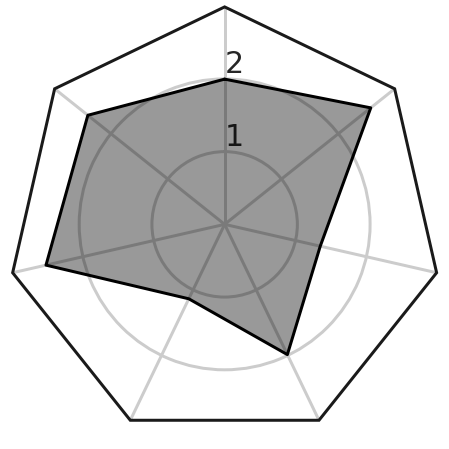

In [233]:
# data_list = ['MANOVA_f_123_rmsubcor.npy', 'MANOVA_t_12_rmsubcor.npy', 'MANOVA_t_13_rmsubcor.npy', 'MANOVA_t_23_rmsubcor.npy']
# data_list = ['MANOVA_f_123_whole_rmsubcor.npy', 'MANOVA_t_12_whole_rmsubcor.npy', 'MANOVA_t_13_whole_rmsubcor.npy', 'MANOVA_t_23_whole_rmsubcor.npy']
# data_list = ['MANOVA_t_GradIG_rmsubcor.npy', 'MANOVA_t_GradIG_whole_rmsubcor.npy']
# data_list = ['MANOVA_f_123_rmsubcor_fdr01.npy', 'MANOVA_t_12_rmsubcor_fdr01.npy', 'MANOVA_t_13_rmsubcor_fdr01.npy', 'MANOVA_t_23_rmsubcor_fdr01.npy'] # Lemon FDR 0.01
# data_list = [DC_sub1_mean]#, DC_sub2_mean, DC_sub3_mean]
# data_list = [ME_sub1_mean, ME_sub2_mean, ME_sub3_mean]
data_list = [grad1_testmean, grad2_testmean, grad3_testmean] # For before Figure 2 supplement
data_list = [MANOVA_IG_f_123_rmsubcor]

for i in data_list:

#     data = np.load(join(path_work, 'main_result/AE', f'{i}')) # for MANOVA
    data = i # for DC
    data_yeo = np.array([abs(data)[BNA2yeo7==i].mean() for i in range(BNA2yeo7.max()+1)])
    print(data_yeo)
    plot_spider(data_yeo)

In [452]:
def plot_spider(data_yeo):

    from math import pi
    from matplotlib.spines import Spine
    from matplotlib.path import Path
    from matplotlib.transforms import Affine2D

    labels = yeo7net # label
    num_labels = len(labels)

    angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
    angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
#     sns.set(style = 'white', font_scale=1)
    
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot(projection='polar')
    
    color = 'black'
    data = data_yeo.tolist()
    data += data[:1]

    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향

    plt.xticks(angles[:-1], labels, fontsize=20) ## x축 눈금 라벨
#     ax.tick_params(axis='x', which='major', pad=30) ## x축과 눈금 사이에 여백을 준다.
    ax.tick_params(axis='x', which='both', labelbottom=False) ## Remove xticks

    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([5, 10, 15],['5','10','15'], fontsize=30) ## y축 눈금 설정
    plt.ylim([5,20])    

    ax.plot(angles, data, color=color, linewidth=3, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    for g in ax.yaxis.get_gridlines(): ## surround inner grid line 
        g.get_path()._interpolation_steps = len(labels)
        g.set_linewidth(3)
        
        
    for g in ax.xaxis.get_gridlines(): ## linear inner grid line 
        g.set_linewidth(3)
        

    spine = Spine(axes=ax, spine_type='circle', path=Path.unit_regular_polygon(len(labels))) # edge grid line
    spine.set_linewidth(3)
    spine.set_color('k')
 
    ## Axes의 중심과 반지름을 맞춰준다.
    spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
    
    ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.    
    
#     plt.title('Spider test', size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
    plt.show()

# Compare discovery replication

In [787]:
# save TFEQ score

Main_AE_Score = DataFrame([BMI[main_otest_idx], TFEQ_F1[main_otest_idx], TFEQ_F2[main_otest_idx], TFEQ_F3[main_otest_idx]]).T
Main_AE_Score.columns = ['BMI','TFEQ_F1','TFEQ_F2','TFEQ_F3']
Main_AE_Score.reset_index(inplace=True)
Main_AE_Score['Subtype'] = main_cluster_label
Main_AE_Score
# Main_AE_Score.to_excel(join(main_path,'result/latent_210/main_result/AE/Main_AE_Score.xlsx'), sheet_name = 'Sheet1', header = True)

,index,BMI,TFEQ_F1,TFEQ_F2,TFEQ_F3,Subtype
0,253,23.6253,17.0,12.0,15.0,2
1,225,26.7955,10.0,5.0,4.0,0
2,286,26.0593,18.0,10.0,8.0,1
3,105,35.0340,10.0,8.0,7.0,2
4,136,21.6597,18.0,3.0,2.0,2
...,...,...,...,...,...,...
80,86,34.3750,10.0,6.0,9.0,0
81,281,26.5453,7.0,2.0,1.0,1
82,346,25.6816,13.0,2.0,2.0,2
83,45,39.6719,8.0,5.0,1.0,2


In [248]:
# Comare eNKI / Lemon subtype score

path_data = join(main_path,'result/latent_210')
Main_AE_Score = pd.read_excel(join(path_data, 'main_result', 'AE', 'Main_AE_Score.xlsx'), sheet_name='Sheet1', skiprows=0)
Lemon_Score = pd.read_excel(join(path_data, 'validation', 'Lemon_score.xlsx'), sheet_name='Sheet1', skiprows=0)

Main_AE_Score['Dataset'] = 'Discovery'
Lemon_Score['Dataset'] = 'Replication'

p value :  0.5164375973506914
Discovery score :  4.0  +-  2.632217967526897
Replication score :  4.3768115942028984  +-  2.6071251311119235
 
p value :  0.5297450489334838
Discovery score :  5.85  +-  4.003616785910092
Replication score :  5.333333333333333  +-  2.850314681804578
 
p value :  0.20828813965303958
Discovery score :  4.037037037037037  +-  2.941499898422852
Replication score :  4.876712328767123  +-  2.943661766686425
 
[4.3768115942028984, 5.333333333333333, 4.876712328767123]
[4.0, 5.85, 4.037037037037037]

0.25577482453559874
[0.87995245 0.61303788        nan]


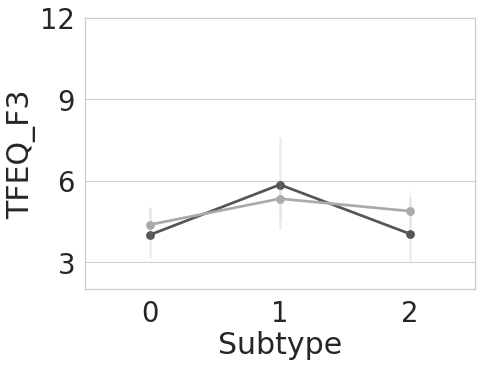

In [294]:
score_name = 'TFEQ_F3' # BMI TFEQ_F1 TFEQ_F2 TFEQ_F3
df_ABD1 = DataFrame([Main_AE_Score[score_name], Main_AE_Score['Subtype'], Main_AE_Score['Dataset']]).T
df_ABD2 = DataFrame([Lemon_Score[score_name], Lemon_Score['Subtype'], Lemon_Score['Dataset']]).T

df_ABD12 = pd.concat([df_ABD1, df_ABD2], axis=0)

df_plot = df_ABD12[df_ABD12[score_name]>0]

plt.figure(1,(7,5))
sns.set(style = 'whitegrid', font_scale=2.5)
g = sns.pointplot(x = 'Subtype' , y = score_name, hue = 'Dataset', data = df_plot,  palette = "gray", plot_kws=dict(alpha=1))
# plt.title(score_name, fontsize = 25)
# plt.xlabel('Subtype', fontsize = 25)
# plt.ylabel(score_name, fontsize = 25)
plt.ylim([2,12]) # [18,33] # [2,12]
plt.yticks([3,6,9,12]) # [20,24,28,32] # [3,6,9,12]
plt.legend(fontsize = 20, loc = 'lower right')
plt.legend([],[], frameon=False) # remove legend
plt.setp(g.collections, alpha = 1)
plt.setp(g.lines[1:4], alpha=.1)  
plt.setp(g.lines[5:8], alpha=.1)  

# sns.swarmplot(x = 'ASD Subtype' , y = 'ADOS Communication', data = df_plot, color = '.25')

is_Dis = df_plot['Dataset'] == 'Discovery'
is_Rep = df_plot['Dataset'] == 'Replication'
is_sub1 = df_plot['Subtype'] == 0
is_sub2 = df_plot['Subtype'] == 1
is_sub3 = df_plot['Subtype'] == 2

chi_ob=[]
chi_expect=[]

for num in [is_sub1, is_sub2, is_sub3]:
    print('p value : ',sc.stats.ttest_ind(df_plot[num & is_Dis][score_name],df_plot[num & is_Rep][score_name])[1])
    print('Discovery score : ',df_plot[num & is_Dis][score_name].mean(),' +- ',df_plot[num & is_Dis][score_name].std())
    print('Replication score : ',df_plot[num & is_Rep][score_name].mean(),' +- ',df_plot[num & is_Rep][score_name].std())
    print(' ')
    chi_expect.append(df_plot[num & is_Dis][score_name].mean())
    chi_ob.append(df_plot[num & is_Rep][score_name].mean())

# Chi square test between Discovery and Replication
print(chi_ob)
print(chi_expect)

chi_stat, chi_pval = sc.stats.chisquare(chi_ob, f_exp=chi_expect, axis=None, ddof = [0,1,2])

print('')
print(chi_stat)
print(chi_pval)

# Utils (def)

In [118]:
# Find significant different latent feature element from each subtype
import statsmodels as sm
from statsmodels.stats.multitest import multipletests


def latent_sig_elem_ttest(input_a,input_b, k):
    [s,p] = sc.stats.ttest_ind(input_a, input_b, axis=0, equal_var=False)
    p_fdr = sm.stats.multitest.multipletests(p,alpha=0.001,method='fdr_bh')
    sig_idx = np.where(p_fdr[0]==True)[0]
    
    cohens_d = s*np.sqrt(1/len(input_a)+1/len(input_b))

    print('총', len(sig_idx), '개')

    topk_idx = np.argsort(np.abs(s[sig_idx]))[-k:][::-1]
    Cohend_large_idx = np.where(np.abs(cohens_d[sig_idx])>=1.2)[0]
#     print(f'Very large effect size {len(Cohend_large_idx)}')
    print(f'Cohen d value : {np.round(cohens_d[sig_idx],2)}') # cohens_d[sig_idx] cohens_d[sig_idx][Cohend_large_idx]
    print(f'Region index : {sig_idx}') # sig_idx sig_idx[Cohend_large_idx] 
    
    return sig_idx # sig_idx sig_idx[Cohend_large_idx]
    
def latent_sig_elem_anova(input_a,input_b, input_c, k):
    [s,p] = sc.stats.f_oneway(input_a, input_b, input_c)
    p_fdr = sm.stats.multitest.multipletests(p,alpha=0.05,method='fdr_bh')
    sig_idx = np.where(p_fdr[0]==True)[0]
    
    print(len(sig_idx), '개')

    topk_idx = np.argsort(np.abs(s[sig_idx]))[-k:][::-1]
    print(f'Top {k} Statistic value : {np.round(s[sig_idx][topk_idx],2)}')
    print(f'Top {k} Region index : {sig_idx[topk_idx]}')
    
    return sig_idx[topk_idx]

In [47]:
def output2numpy(result1,result2,result3):

    result1 = torch.cat(result1).detach().cpu().numpy()
    result2 = torch.cat(result2).detach().cpu().numpy()
    result3 = torch.cat(result3).detach().cpu().numpy()

    return result1, result2, result3

In [63]:
# Subtype Score Plot

def score_plot(trial, otest_idx, cluster_label, save=True, plot_close=True):

    import seaborn as sns

#     y = TFEQ_F3 # BMI WHR EDE_Q_R EDE_Q_con EDE_Q_E_con EDE_Q_S_con EDE_Q_W_con TFEQ_F1 TFEQ_F2 TFEQ_F3 

    idx = otest_idx # itrain_idx itest_idx otest_idx

    df = pd.DataFrame([np.array(BMI)[idx], np.array(WHR)[idx], np.array(EDE_Q_R)[idx], np.array(EDE_Q_con)[idx], np.array(EDE_Q_E_con)[idx], np.array(EDE_Q_S_con)[idx], 
                       np.array(EDE_Q_W_con)[idx], np.array(TFEQ_F1)[idx], np.array(TFEQ_F2)[idx], np.array(TFEQ_F3)[idx], cluster_label]) # cluster_labels  label_manual
    df = df.T
    df.columns = ['BMI','WHR','EDE_Q_R','EDE_Q_con','EDE_Q_E_con','EDE_Q_S_con','EDE_Q_W_con','TFEQ_F1','TFEQ_F2','TFEQ_F3','Subtype']

    fig, axes = plt.subplots(2, 5, figsize=(30, 10))

    sns.set(style = 'whitegrid', font_scale=1.0)
    sns.boxplot(ax = axes[0,0], x = 'Subtype' , y = 'BMI', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,0], x = 'Subtype' , y = 'BMI', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,1], x = 'Subtype' , y = 'WHR', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,1], x = 'Subtype' , y = 'WHR', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,2], x = 'Subtype' , y = 'EDE_Q_R', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,2], x = 'Subtype' , y = 'EDE_Q_R', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,3], x = 'Subtype' , y = 'EDE_Q_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,3], x = 'Subtype' , y = 'EDE_Q_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[0,4], x = 'Subtype' , y = 'EDE_Q_E_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[0,4], x = 'Subtype' , y = 'EDE_Q_E_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,0], x = 'Subtype' , y = 'EDE_Q_S_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,0], x = 'Subtype' , y = 'EDE_Q_S_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,1], x = 'Subtype' , y = 'EDE_Q_W_con', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,1], x = 'Subtype' , y = 'EDE_Q_W_con', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,2], x = 'Subtype' , y = 'TFEQ_F1', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,2], x = 'Subtype' , y = 'TFEQ_F1', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,3], x = 'Subtype' , y = 'TFEQ_F2', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,3], x = 'Subtype' , y = 'TFEQ_F2', data = df, color = 'k', size = 4)

    sns.boxplot(ax = axes[1,4], x = 'Subtype' , y = 'TFEQ_F3', data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(ax = axes[1,4], x = 'Subtype' , y = 'TFEQ_F3', data = df, color = 'k', size = 4)
    
    if save:
        fig.savefig(join(save_path,trial,'score_plot.png'))
        
    if plot_close:
        plt.close('all')

In [49]:
def stat_result(trial, otest_idx, cluster_label, save=True, result_show = True):

    bmi = np.array(BMI)
    whr = np.array(WHR)
    e_r = np.array(EDE_Q_R)
    e_c = np.array(EDE_Q_con)
    e_ec = np.array(EDE_Q_E_con)
    e_sc = np.array(EDE_Q_S_con)
    e_wc = np.array(EDE_Q_W_con) 
    t_f1 = np.array(TFEQ_F1)
    t_f2 = np.array(TFEQ_F2)
    t_f3 = np.array(TFEQ_F3)

    idx = otest_idx # itrain_idx itest_idx otest_idx
    label = cluster_label # cluster_labels cluster_label label_manual

    idx1 = idx[np.where(label==0)[0]]
    idx2 = idx[np.where(label==1)[0]]
    idx3 = idx[np.where(label==2)[0]]
    idx4 = idx[np.where(label==3)[0]]
    idx5 = idx[np.where(label==4)[0]]
    idx6 = idx[np.where(label==5)[0]]

    # Statistical test

    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests

    BMI_fdr = []
    WHR_fdr = []
    EDEQ_R_fdr = []
    EDEQ_Con_fdr = []
    EDEQ_E_Con_fdr = []
    EDEQ_S_Con_fdr = []
    EDEQ_W_Con_fdr = []
    TFEQ_F1_fdr = []
    TFEQ_F2_fdr = []
    TFEQ_F3_fdr = []

    idx_list1 = [idx1, idx1, idx2]
    idx_list2 = [idx2, idx3, idx3]

    for i in range(3):

        a = idx_list1[i] # idx1 idx1 idx2
        b = idx_list2[i] # idx2 idx3 idx3

        [s_0,p_0] = sc.stats.ttest_ind(bmi[a], bmi[b], equal_var = False, axis=0)

        [s_1,p_1] = sc.stats.ttest_ind(whr[a], whr[b], equal_var = False, axis=0) 

        [s_2,p_2] = sc.stats.ttest_ind(e_r[a], e_r[b], equal_var = False, axis=0) 

        [s_3,p_3] = sc.stats.ttest_ind(e_c[a], e_c[b], equal_var = False, axis=0) 

        [s_4,p_4] = sc.stats.ttest_ind(e_ec[a], e_ec[b], equal_var = False, axis=0) 

        [s_5,p_5] = sc.stats.ttest_ind(e_sc[a], e_sc[b], equal_var = False, axis=0) 

        [s_6,p_6] = sc.stats.ttest_ind(e_wc[a], e_wc[b], equal_var = False, axis=0) 

        [s_7,p_7] = sc.stats.ttest_ind(t_f1[a], t_f1[b], equal_var = False, axis=0) 

        [s_8,p_8] = sc.stats.ttest_ind(t_f2[a], t_f2[b], equal_var = False, axis=0) 

        [s_9,p_9] = sc.stats.ttest_ind(t_f3[a], t_f3[b], equal_var = False, axis=0) 

        p_0_fdr = sm.stats.multitest.multipletests(p_0,alpha=0.05,method='fdr_bh')
        p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
        p_2_fdr = sm.stats.multitest.multipletests(p_2,alpha=0.05,method='fdr_bh')
        p_3_fdr = sm.stats.multitest.multipletests(p_3,alpha=0.05,method='fdr_bh')
        p_4_fdr = sm.stats.multitest.multipletests(p_4,alpha=0.05,method='fdr_bh')
        p_5_fdr = sm.stats.multitest.multipletests(p_5,alpha=0.05,method='fdr_bh')
        p_6_fdr = sm.stats.multitest.multipletests(p_6,alpha=0.05,method='fdr_bh')
        p_7_fdr = sm.stats.multitest.multipletests(p_7,alpha=0.05,method='fdr_bh')
        p_8_fdr = sm.stats.multitest.multipletests(p_8,alpha=0.05,method='fdr_bh')
        p_9_fdr = sm.stats.multitest.multipletests(p_9,alpha=0.05,method='fdr_bh')

        BMI_fdr.append(p_0_fdr[1][0])
        WHR_fdr.append(p_1_fdr[1][0])
        EDEQ_R_fdr.append(p_2_fdr[1][0])
        EDEQ_Con_fdr.append(p_3_fdr[1][0])
        EDEQ_E_Con_fdr.append(p_4_fdr[1][0])
        EDEQ_S_Con_fdr.append(p_5_fdr[1][0])
        EDEQ_W_Con_fdr.append(p_6_fdr[1][0])
        TFEQ_F1_fdr.append(p_7_fdr[1][0])
        TFEQ_F2_fdr.append(p_8_fdr[1][0])
        TFEQ_F3_fdr.append(p_9_fdr[1][0])

    result = {'BMI' : [np.round(i,4) for i in BMI_fdr], 
                   'WHR' : [np.round(i,4) for i in WHR_fdr], 
                   'EDEQ_R' : [np.round(i,4) for i in EDEQ_R_fdr],
                   'EDEQ_Con' : [np.round(i,4) for i in EDEQ_Con_fdr], 
                   'EDEQ_E_Con' : [np.round(i,4) for i in EDEQ_E_Con_fdr], 
                   'EDEQ_S_Con' : [np.round(i,4) for i in EDEQ_S_Con_fdr],
                   'EDEQ_W_Con' : [np.round(i,4) for i in EDEQ_W_Con_fdr], 
                   'TFEQ_F1' : [np.round(i,4) for i in TFEQ_F1_fdr], 
                   'TFEQ_F2' : [np.round(i,4) for i in TFEQ_F2_fdr],
                   'TFEQ_F3' : [np.round(i,4) for i in TFEQ_F3_fdr]}
    
    if save:
        np.save(join(save_path,trial,'stat_result.npy'), result)

    if result_show:
        for key, val in result.items():
            print(f'{key}    :    {val}')

In [50]:
# Subtype score mean std

def subtype_score(cluster_label, subj_idx):
    subtype_idx = []
    for i in range(cluster_label.max()+1):
        subtype_idx.append(np.where(cluster_label==i)[0])

    score_label = ['BMI', 'TFEQ_F1', 'TFEQ_F2', 'TFEQ_F3']
    for i, s in enumerate([BMI, TFEQ_F1, TFEQ_F2, TFEQ_F3]):
        a = np.array(s)[subj_idx][subtype_idx[0]]
        b = np.array(s)[subj_idx][subtype_idx[1]]
        c = np.array(s)[subj_idx][subtype_idx[2]]

        print(score_label[i])
        print(f'{np.round(a.mean(),2)} +- {np.round(a.std(),2)}')
        print(f'{np.round(b.mean(),2)} +- {np.round(b.std(),2)}')
        print(f'{np.round(c.mean(),2)} +- {np.round(c.std(),2)}')
        print('')

In [395]:
def label_subj(cluster_label):
    idx = []
    for i in range(cluster_label.max()+1):
        print(f'label {i} :', len(np.where(cluster_label==i)[0]))
        idx.append(np.where(cluster_label==i)[0])
    return idx

In [773]:
def permutation_ttest(score_data, otest_idx, cluster_label, random_state):

    from sklearn.utils import shuffle
    
    idx = otest_idx
    label = cluster_label

    idx1 = idx[np.where(label==0)[0]]
    idx2 = idx[np.where(label==1)[0]]
    idx3 = idx[np.where(label==2)[0]]

    score = np.array(score_data)
    
    idx_list1 = [idx1, idx1, idx2]
    idx_list2 = [idx2, idx3, idx3]
    
    p_list = []
    
    for num in range(3):

        x_data = score[idx_list1[num]]
        y_data = score[idx_list2[num]]

        n_perm = 1000
        all_t = np.zeros(n_perm)

#         print('T-test\n')
        observe = sc.stats.ttest_ind(x_data,y_data)[0]

        X = np.concatenate((x_data,y_data))
        z = np.concatenate((np.ones(x_data.shape[0]),np.zeros(y_data.shape[0])))

        for i in range(n_perm):
            z = shuffle(z, random_state = random_state) # main perm 2, 30% 10, 20% 0, Gau 15,AE_dropx 15, AE_420 15, AE_120 15, ME 16, gradient 16, boot_470 58, boot_562 6, boot_626 4, Lemon 44
            xn = X[z==1]
            yn = X[z==0]
            all_t[i] = sc.stats.ttest_ind(xn,yn)[0]
        
        pval = np.array((abs(np.array(all_t)) >= abs(observe))).mean()
        print('p value : ', pval)
        p_list.append(pval)

#         plt.figure(num, (5,5))
#         plt.hist(all_t, bins = 50)
#         plt.axvline(observe, color = 'r', linestyle = '--')
#         plt.xlabel('t value')
#         plt.ylabel('Frequency')
    print('')
    return np.array(p_list)